# Multiple Linear Regression

data dalam file p1_test.csv berkaitan dengan pengukuran atau pengamatan cuaca dan kondisi lingkungan yang digunakan untuk memprediksi suatu variabel terkait waktu atau kejadian tertentu dalam sehari.

Beberapa kolom dalam data ini meliputi:

1. id - sebagai penanda unik untuk setiap observasi atau catatan.
2. year - Tahun pengambilan data.
3. hour - Jam dalam sehari (0-23) menggambarkan waktu pengamatan.
4. season - Musim pada waktu pengambilan data, dikodekan (misalnya 1 untuk musim semi, 2 untuk musim panas, dll.).
5. holiday - Mengindikasikan apakah hari tersebut adalah hari libur (dengan nilai biner: 0 untuk bukan libur, 1 untuk libur).
6. workingday - Mengindikasikan apakah hari tersebut adalah hari kerja (kemungkinan biner).
7. weather - Kondisi cuaca, dikodekan (contohnya 1 untuk cuaca cerah, 2 untuk berawan, dll.).
8. temp - Suhu pada saat pengamatan.
9. atemp - Suhu yang terasa atau suhu nyata (apparent temperature).
10. humidity - Kelembaban udara.
11. windspeed - Kecepatan angin.

## Import Libraries and Data

In [ ]:
# Load library/package
import os
import warnings
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import metrics
from scipy.stats import shapiro

# Sklearn
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Statmodels
import statsmodels
import statsmodels.api as sm

In [ ]:
data_path = 'p1_test.csv'
data = pd.read_csv(data_path, sep=';')


In [ ]:
data.head(5)

,id,year,hour,season,holiday,workingday,weather,temp,atemp,humidity,windspeed
0,1,2012,21,3,0,0,1,29.52,34.850,79,6.0032
1,2,2012,3,2,0,0,1,23.78,27.275,83,0.0000
2,6,2011,10,1,0,1,3,16.40,20.455,0,11.0014
3,14,2012,19,1,0,1,1,13.94,15.150,46,19.9995
4,17,2011,23,3,0,1,2,26.24,30.305,73,11.0014


In [ ]:
X = data[['temp', 'humidity', 'windspeed']]
y = data['hour']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## Exploratory Data Analysis (EDA) & Data Preprocessing

#### Data Type

In [ ]:
# Mendapatkan informasi dari data
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3196 entries, 0 to 3195
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   id          3196 non-null   int64  
 1   year        3196 non-null   int64  
 2   hour        3196 non-null   int64  
 3   season      3196 non-null   int64  
 4   holiday     3196 non-null   int64  
 5   workingday  3196 non-null   int64  
 6   weather     3196 non-null   int64  
 7   temp        3196 non-null   float64
 8   atemp       3196 non-null   float64
 9   humidity    3196 non-null   int64  
 10  windspeed   3196 non-null   float64
dtypes: float64(3), int64(8)
memory usage: 274.8 KB


In [ ]:
# Melakukan analisa deskriptif
data.describe()

,id,year,hour,season,holiday,workingday,weather,temp,atemp,humidity,windspeed
count,3196.000000,3196.000000,3196.000000,3196.000000,3196.000000,3196.000000,3196.000000,3196.000000,3196.000000,3196.000000,3196.000000
mean,5397.491865,2011.517209,11.482478,2.508135,0.027534,0.689299,1.437735,20.147472,23.559096,62.155507,12.795088
std,3137.008909,0.499782,6.916855,1.116779,0.163660,0.462853,0.645827,7.711755,8.377614,19.105470,8.131574
min,1.000000,2011.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.820000,0.760000,0.000000,0.000000
25%,2639.750000,2011.000000,6.000000,2.000000,0.000000,0.000000,1.000000,13.940000,16.665000,47.000000,7.001500
50%,5374.500000,2012.000000,11.000000,3.000000,0.000000,1.000000,1.000000,20.500000,24.240000,62.000000,12.998000
75%,8099.750000,2012.000000,18.000000,4.000000,0.000000,1.000000,2.000000,26.240000,31.060000,78.000000,16.997900
max,10874.000000,2012.000000,23.000000,4.000000,1.000000,1.000000,3.000000,38.540000,43.940000,100.000000,56.996900


### Missing Value



Missing value adalah data yang hilang, atau nilai yang hilang, terjadi ketika tidak ada nilai data yang disimpan untuk variabel dalam pengamatan. Kita ingin melakukan identifikasi, apakah terdapat data yang missing atau tidak dalam observasi pengamatan.

In [ ]:
# Check missing value
data.isna().sum()

,0
id,0
year,0
hour,0
season,0
holiday,0
workingday,0
weather,0
temp,0
atemp,0
humidity,0


### Duplicates data

Melakukan identifikasi, apakah terdapat data/observasi yang sama atau tidak

In [ ]:
# Cek duplicate
duplicate = data[data.duplicated()]
duplicate

,id,year,hour,season,holiday,workingday,weather,temp,atemp,humidity,windspeed


In [ ]:
# drop duplicate
data.drop_duplicates(inplace=True)

In [ ]:
# Cek ukuran data apakah duplicate sudah terhapus
data.shape

(3196, 11)

### Asumsi Analisis Regresi

Uji Asumsi klasik adalah analisis yang dilakukan untuk menilai apakah di dalam sebuah model regresi linear Ordinary Least Square (OLS) terdapat masalah-masalah asumsi klasik.

#### Uji Normalitas

Uji Normalitas adalah uji statistik yang dilakukan untuk mengetahui bagaimana sebaran sebuah data.

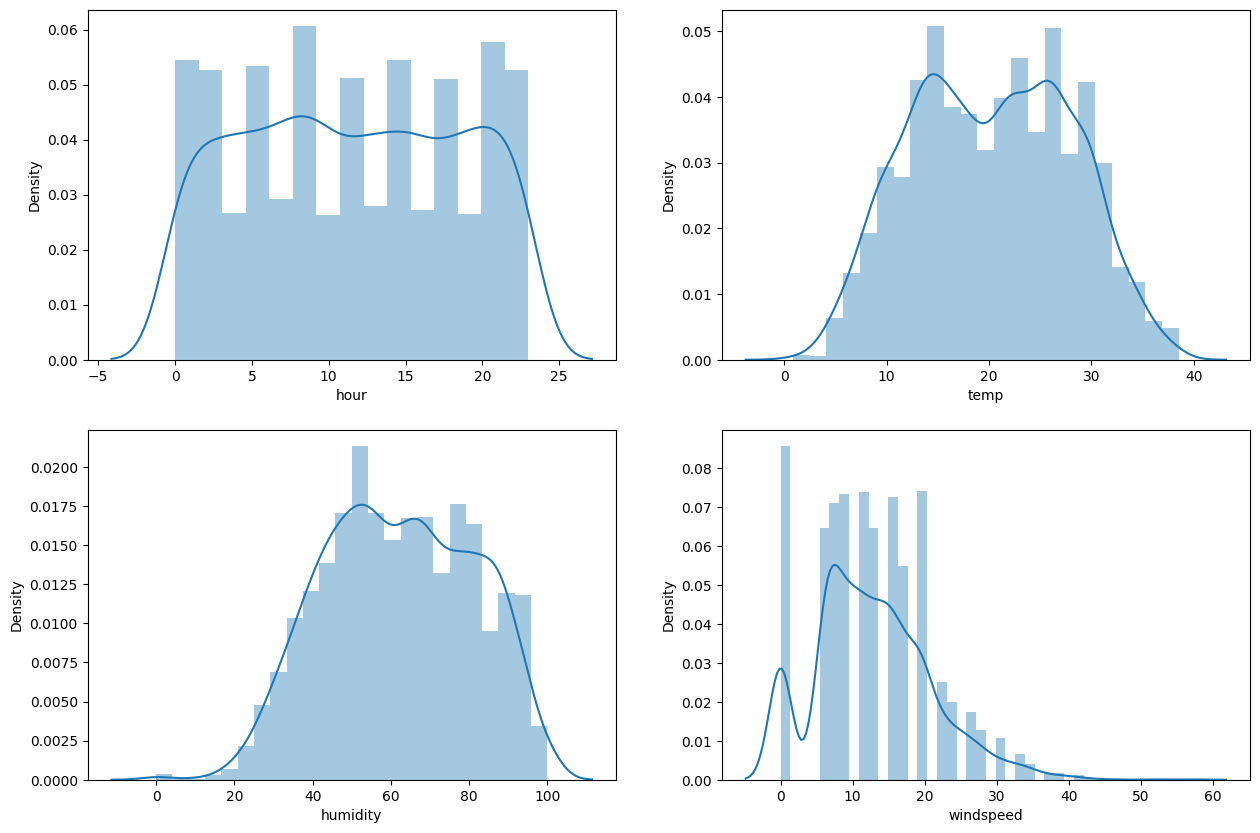

In [ ]:
# Cek normalitas data dengan histogram
warnings.filterwarnings('ignore')
fig, axes = plt.subplots(2, 2, figsize=(15, 10))

sns.distplot(data["hour"], ax=axes[0, 0])
sns.distplot(data["temp"], ax=axes[0, 1])
sns.distplot(data["humidity"], ax=axes[1, 0])
sns.distplot(data["windspeed"], ax=axes[1, 1])
plt.show()

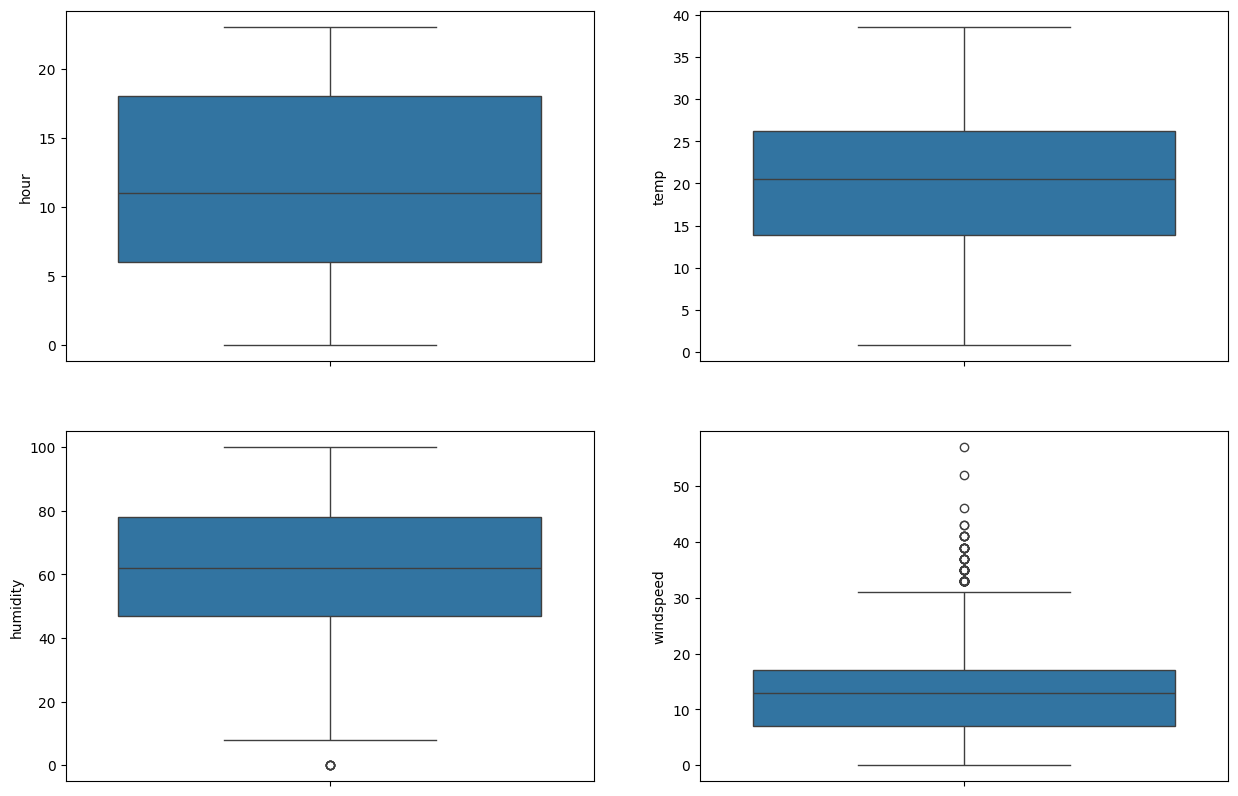

In [ ]:
# Cek normalitas data dengan boxplot
fig, axes = plt.subplots(2, 2, figsize=(15, 10))

sns.boxplot(data["hour"], ax=axes[0, 0])
sns.boxplot(data["temp"], ax=axes[0, 1])
sns.boxplot(data["humidity"], ax=axes[1, 0])
sns.boxplot(data["windspeed"], ax=axes[1, 1])
plt.show()

visualisasi diatas menampilkan boxplot dari empat variabel: hour, temp, humidity, dan windspeed. Distribusi hour merata dari 0 hingga 23 dengan median sekitar jam 12, menunjukkan data waktu yang tersebar sepanjang hari. Variabel temp atau suhu memiliki rentang antara 0 hingga 35 derajat dengan median di tengah rentang, menunjukkan distribusi yang simetris tanpa outlier. Variabel humidity atau kelembaban cenderung berada di kisaran tinggi (60-80), dengan beberapa outlier di kelembaban rendah. Terakhir, variabel windspeed menunjukkan kecepatan angin yang umumnya rendah dengan median di sekitar 10, tetapi terdapat sejumlah outlier yang menunjukkan adanya nilai kecepatan angin yang jauh lebih tinggi dibandingkan nilai mayoritas.

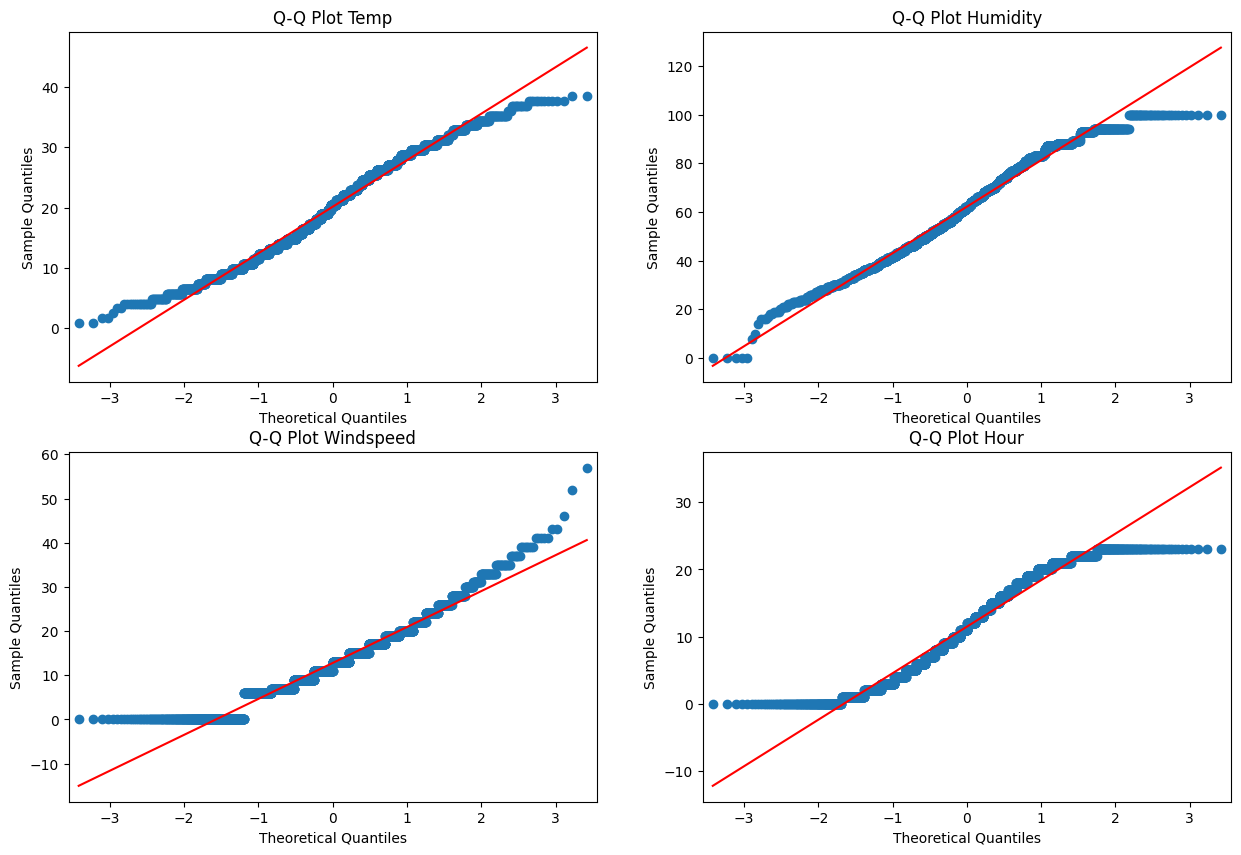

In [ ]:
# Cek normalitas data dengan Q-Q plot
fig, axes = plt.subplots(2, 2, figsize=(15, 10))

sm.graphics.qqplot(data["temp"].dropna(), line='s', ax=axes[0, 0])
axes[0, 0].title.set_text('Q-Q Plot Temp')

sm.graphics.qqplot(data["humidity"].dropna(), line='s', ax=axes[0, 1])
axes[0, 1].title.set_text('Q-Q Plot Humidity')

sm.graphics.qqplot(data["windspeed"].dropna(), line='s', ax=axes[1, 0])
axes[1, 0].title.set_text('Q-Q Plot Windspeed')

sm.graphics.qqplot(data["hour"].dropna(), line='s', ax=axes[1, 1])
axes[1, 1].title.set_text('Q-Q Plot Hour')

plt.show()

Uji Normalitas dengan Shapiro Wilk

H0 : data berdistribusi normal<br>
H1 : data tidak berdistribusi normal

In [ ]:
# Cek Normalitas dengan Uji Shapiro-Wilk
column = data.columns

for i in column:
  stat, p = shapiro(data[i])
  print('Statistics=%.3f, p=%.3f' % (stat, p))
  # Pengujian Hipotesis
  alpha = 0.05
  if p > alpha:
    print('Gagal Tolak H0, {} berdistribusi normal'.format(i))
  else:
    print('Tolak H0, {} tidak berdistribusi normal'.format(i))

Statistics=0.954, p=0.000
Tolak H0, id tidak berdistribusi normal
Statistics=0.636, p=0.000
Tolak H0, year tidak berdistribusi normal
Statistics=0.951, p=0.000
Tolak H0, hour tidak berdistribusi normal
Statistics=0.856, p=0.000
Tolak H0, season tidak berdistribusi normal
Statistics=0.150, p=0.000
Tolak H0, holiday tidak berdistribusi normal
Statistics=0.582, p=0.000
Tolak H0, workingday tidak berdistribusi normal
Statistics=0.667, p=0.000
Tolak H0, weather tidak berdistribusi normal
Statistics=0.982, p=0.000
Tolak H0, temp tidak berdistribusi normal
Statistics=0.983, p=0.000
Tolak H0, atemp tidak berdistribusi normal
Statistics=0.982, p=0.000
Tolak H0, humidity tidak berdistribusi normal
Statistics=0.958, p=0.000
Tolak H0, windspeed tidak berdistribusi normal


#### Uji Linearitas

Uji Linearitas adalah sifat hubungan yang linear antara variabel, artinya setiap perubahan yang terjadi pada satu variabel akan diikuti perubahan dengan besaran yang sejajar pada variabel lainnya.

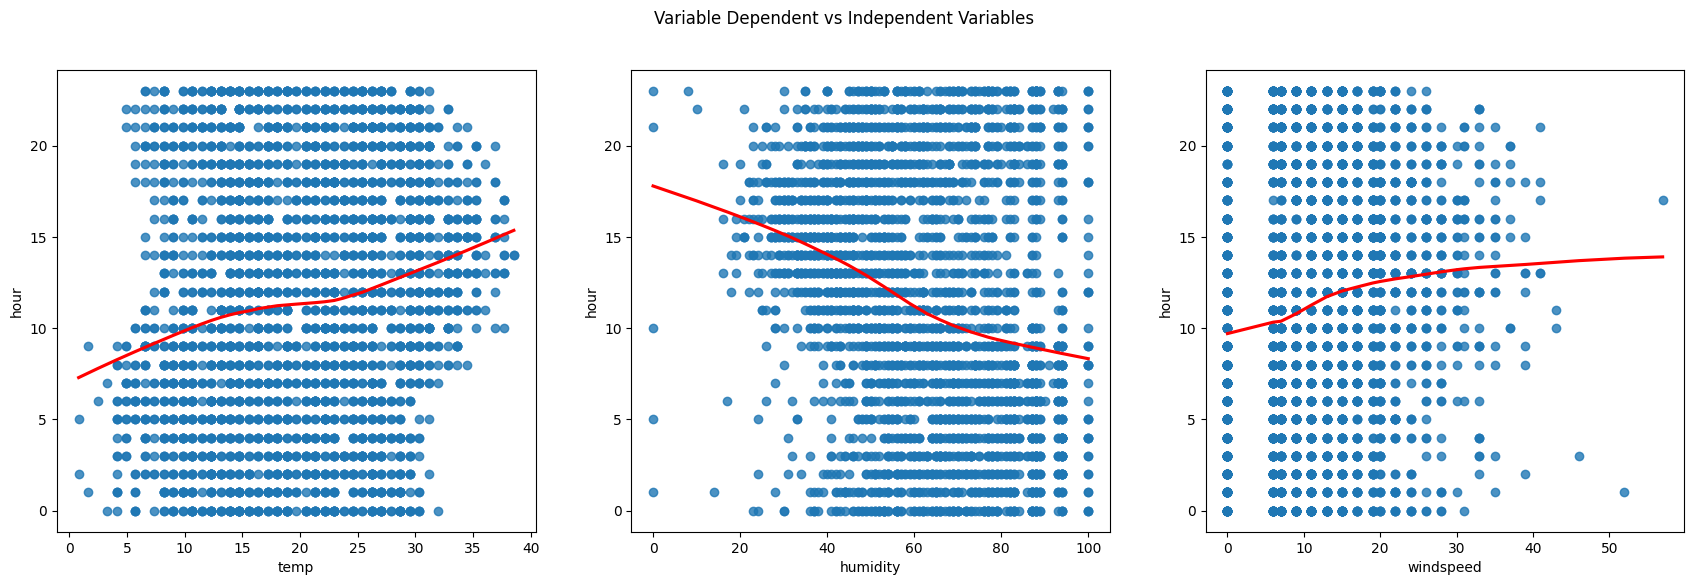

In [ ]:
# Keterkaitan x dengan y
fig, axes = plt.subplots(1, 3, figsize=(21, 6))
fig.suptitle('Variable Dependent vs Independent Variables')

sns.regplot(x=data["temp"], y=data["hour"], lowess=True, line_kws={'color': 'red'}, ax=axes[0])
sns.regplot(x=data["humidity"], y=data["hour"], lowess=True, line_kws={'color': 'red'}, ax=axes[1])
sns.regplot(x=data["windspeed"], y=data["hour"], lowess=True, line_kws={'color': 'red'}, ax=axes[2])
plt.show()

#### Uji Multikolinearitas

Uji multikolinearitas adalah untuk melihat ada atau tidaknya korelasi yang tinggi antara variabel-variabel bebas dalam suatu model regresi linear berganda

<Axes: >

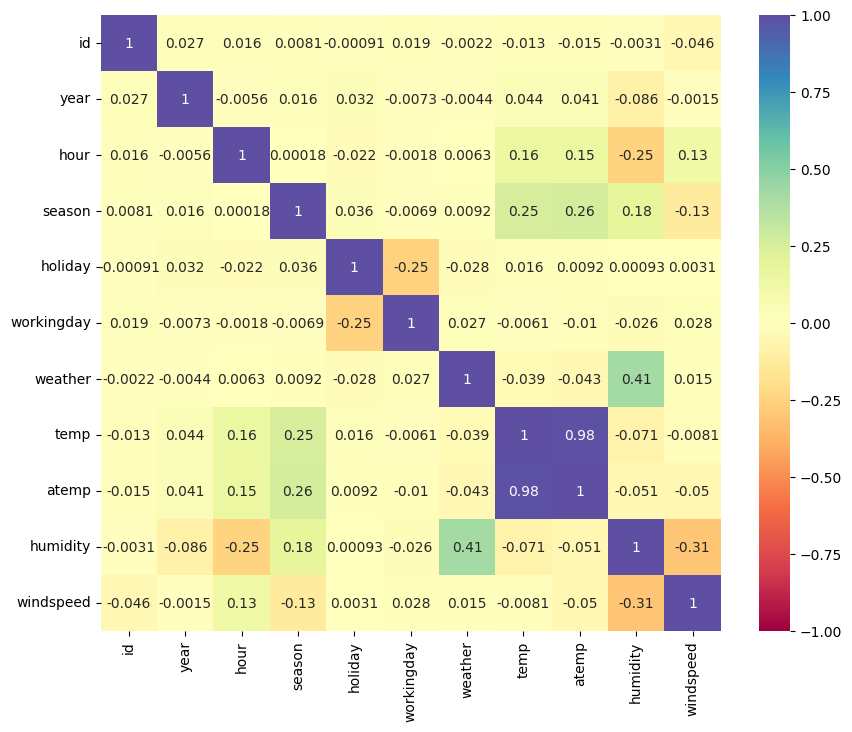

In [ ]:
plt.figure(figsize=(10,8))
sns.heatmap(data.corr(), vmax=1, vmin=-1, center=0, cmap="Spectral", annot=True)

Setiap sel dalam heatmap menunjukkan nilai koefisien korelasi yang berkisar antara -1 hingga 1. Nilai +1 menandakan korelasi positif sempurna, di mana kenaikan satu variabel diikuti oleh kenaikan variabel lainnya. Sebaliknya, nilai -1 menunjukkan korelasi negatif sempurna, di mana kenaikan satu variabel diikuti penurunan variabel lain. Nilai 0 berarti tidak ada korelasi linear yang kuat antara dua variabel tersebut. Dalam heatmap ini, warna cerah seperti biru dan hijau menunjukkan korelasi positif, sedangkan warna gelap seperti ungu dan merah menunjukkan korelasi negatif. Sebagai contoh, korelasi antara variabel "temp" dan "atemp" sangat kuat dengan nilai 0.98, yang menunjukkan bahwa suhu aktual ("temp") dan suhu yang dirasakan ("atemp") memiliki hubungan linear positif yang hampir sempurna. Sementara itu, korelasi antara "humidity" dan "windspeed" bernilai -0.31, menunjukkan hubungan negatif moderat, di mana peningkatan kelembaban cenderung diikuti oleh penurunan kecepatan angin.

In [ ]:
# Cek Urutan korelasi terendah ke tertinggi
korelasi = data.corr()["hour"].sort_values()
korelasi

,hour
humidity,-0.245534
holiday,-0.021969
year,-0.005571
workingday,-0.001848
season,0.000181
weather,0.006307
id,0.016176
windspeed,0.127517
atemp,0.150719
temp,0.156249


Variabel dengan Korelasi Paling Rendah: <br>

humidity (-0,245634): Menunjukkan bahwa semakin banyak kelembapan, semakin rendah nilai dari jam.

holiday (-0,021090): Hubungan sangat lemah menunjukkan bahwa keberadaan hari libur hampir tidak berpengaruh pada jam.

Variabel lain seperti year, workingday, dan season juga menunjukkan korelasi negatif atau sangat rendah.

Korelasi Tertinggi: <br>

temp (0,156249) dan atemp (0,160719): Menunjukkan hubungan positif dengan jam, artinya semakin tinggi suhu, semakin tinggi nilai jam.

Nilai korelasi yang diperoleh antar variabel bebas relatif kecil, sehingga asumsi terpenuhi

### Scaling
Scaling digunakan untuk merubah skala pada data. Penggunaan scaling dapat membantu mengurangi gap antar kolom dalam data, proses ini tidak merubah distribusi dalam data, hanya melakukan pengubahan skala data.

In [ ]:
# Scale data
scaler = StandardScaler()
scaled_data = scaler.fit_transform(data)
scaled_data

array([[-1.72053586,  0.9661544 ,  1.37620508, ...,  1.34795799,
         0.88179608, -0.83537954],
       [-1.72021703,  0.9661544 , -1.22654086, ...,  0.44362105,
         1.09119296, -1.57375307],
       [-1.71894174, -1.03503125, -0.21436188, ..., -0.37058065,
        -3.25379232, -0.22061764],
       ...,
       [ 1.74540939, -1.03503125,  1.08701109, ...,  1.25722583,
        -0.37458521,  0.51693182],
       [ 1.74572821,  0.9661544 , -1.66033185, ..., -0.82304758,
         0.20125622, -0.71259197],
       [ 1.74604704,  0.9661544 , -0.21436188, ..., -1.0940502 ,
         1.30058984,  0.51693182]])

In [ ]:
# Membuat dataframe dari hasil scalling
scaled_data = pd.DataFrame(scaled_data, columns=data.columns)
scaled_data

,id,year,hour,season,holiday,workingday,weather,temp,atemp,humidity,windspeed
0,-1.720536,0.966154,1.376205,0.440501,-0.168268,-1.489473,-0.677896,1.215546,1.347958,0.881796,-0.835380
1,-1.720217,0.966154,-1.226541,-0.455072,-0.168268,-1.489473,-0.677896,0.471112,0.443621,1.091193,-1.573753
2,-1.718942,-1.035031,-0.214362,-1.350644,-0.168268,0.671378,2.419395,-0.486019,-0.370581,-3.253792,-0.220618
3,-1.716391,0.966154,1.087011,-1.350644,-0.168268,0.671378,-0.677896,-0.805062,-1.003915,-0.845728,0.886119
4,-1.715435,-1.035031,1.665399,0.440501,-0.168268,0.671378,0.870750,0.790155,0.805356,0.567701,-0.220618
...,...,...,...,...,...,...,...,...,...,...,...
3191,1.744134,0.966154,-0.358959,1.336073,-0.168268,0.671378,-0.677896,-0.486019,-0.370581,1.300590,-0.835380
3192,1.745091,-1.035031,0.074832,1.336073,-0.168268,0.671378,2.419395,-0.273323,-0.189713,1.981130,-0.467017
3193,1.745409,-1.035031,1.087011,0.440501,-0.168268,0.671378,-0.677896,1.321894,1.257226,-0.374585,0.516932
3194,1.745728,0.966154,-1.660332,1.336073,-0.168268,0.671378,0.870750,-0.911410,-0.823048,0.201256,-0.712592


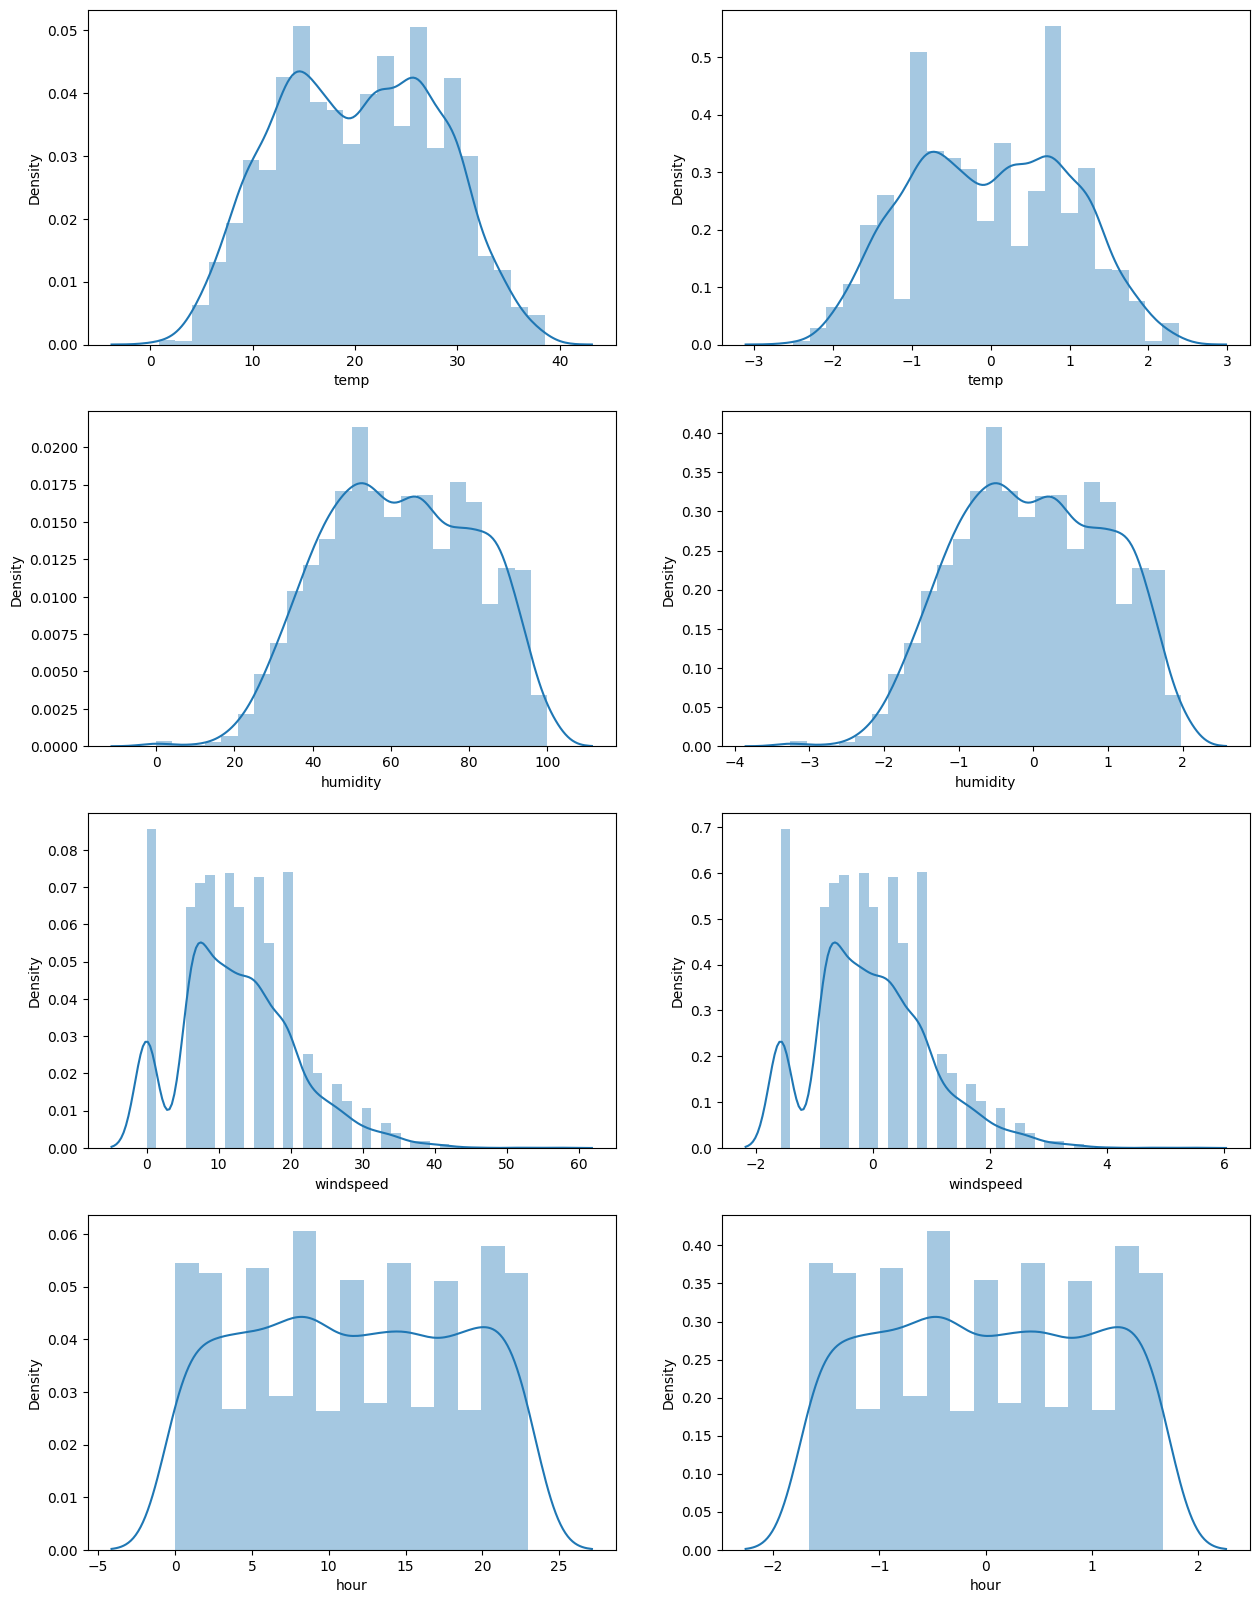

In [ ]:
# Plot variabel sebelum dan sesudah scaling
fig, axes = plt.subplots(4, 2, figsize=(15, 20))

sns.distplot(data["temp"], ax=axes[0, 0])
sns.distplot(scaled_data["temp"], ax=axes[0, 1])
sns.distplot(data["humidity"], ax=axes[1, 0])
sns.distplot(scaled_data["humidity"], ax=axes[1, 1])
sns.distplot(data["windspeed"], ax=axes[2, 0])
sns.distplot(scaled_data["windspeed"], ax=axes[2, 1])
sns.distplot(data["hour"], ax=axes[3, 0])
sns.distplot(scaled_data["hour"], ax=axes[3, 1])
plt.show()

## Membangun Model Regresi

### Train Test Split

Proses ini merupakan proses pembagian data dalam bentuk, train (untuk membangun model), dan test (untuk testing dari model yang terbentuk) dengan pembagian 70% data train dan 30% data test

In [ ]:
X = scaled_data.drop("hour", axis=1).values
y = scaled_data["hour"].values.reshape(-1,1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,random_state=0)

In [ ]:
print("Ukuran X train ", len(X_train))
print("Ukuran X test ", len(X_test))
print("Ukuran y train ", len(y_train))
print("Ukuran y test ", len(y_test))

Ukuran X train  2237
Ukuran X test  959
Ukuran y train  2237
Ukuran y test  959


### Membangun model dengan package Statsmodels

In [ ]:
# Masukkan intercepts secara manual
Input = sm.add_constant(X_train)

In [ ]:
# Modelling dengan statsmodels
SimpleModel = sm.OLS(y_train, Input, missing='drop')
results = SimpleModel.fit()

In [ ]:
# Print results
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.112
Model:                            OLS   Adj. R-squared:                  0.108
Method:                 Least Squares   F-statistic:                     27.99
Date:                Mon, 04 Nov 2024   Prob (F-statistic):           5.81e-51
Time:                        07:32:13   Log-Likelihood:                -3054.4
No. Observations:                2237   AIC:                             6131.
Df Residuals:                    2226   BIC:                             6194.
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0200      0.020     -0.994      0.3

Nilai p untuk variabel independen x1, x8, dan x10 masing-masing menunjukkan signifikansi (P < 0.05), yang mengindikasikan bahwa ketiga variabel tersebut berpengaruh signifikan terhadap y. Namun, nilai p untuk intercept sebesar 0.320 menunjukkan bahwa intercept tidak signifikan dan dapat diabaikan dalam model. Koefisien untuk x1 adalah 0.0202, yang berarti jika x1 bertambah satu, maka y meningkat sebesar 0.0202. Begitu pula, koefisien x2 (0.0220) dan x3 (0.0366) menunjukkan pengaruh positif terhadap y dengan kenaikan yang sesuai. R-squared yang sangat rendah, yaitu 0.112, mengindikasikan bahwa model hanya mampu menjelaskan 11.2% variasi y, menunjukkan potensi perbaikan lebih lanjut dalam pemodelan. Nilai AIC dan BIC yang tercantum dapat digunakan untuk memilih model terbaik di antara beberapa alternatif berdasarkan nilai yang lebih rendah. Nilai Durbin-Watson 2.042 menunjukkan tidak adanya autokorelasi dalam residual.

In [ ]:
print('coefficient of determination:', results.rsquared)
print('adjusted coefficient of determination:', results.rsquared_adj)
print('regression coefficients:', results.params)

coefficient of determination: 0.11169494065429453
adjusted coefficient of determination: 0.10770435188814131
regression coefficients: [-0.01998246 -0.00235854 -0.03562684  0.03661677 -0.0333076   0.00257026
  0.14241919  0.05884212  0.08784599 -0.30208676  0.04899796]


In [ ]:
# membuat list
list_columns = []

for i in data.columns:
  if i != "hours":
    list_columns.append(i)

In [ ]:
list_columns

['id',
 'year',
 'hour',
 'season',
 'holiday',
 'workingday',
 'weather',
 'temp',
 'atemp',
 'humidity',
 'windspeed']

In [ ]:
# Membuat Prediksi Model
Input_test = sm.add_constant(X_test)
prediction_1 = results.predict(Input_test)

# Membuat daftar kolom berdasarkan fitur yang ada di X_test
list_columns = scaled_data.drop("hour", axis=1).columns.tolist()

# Tampilkan hasil prediksi dalam bentuk DataFrame
df_statsmod = pd.DataFrame(X_test, columns=list_columns)
df_statsmod["actual_hour"] = y_test
df_statsmod["prediction_hour"] = prediction_1
df_statsmod.head()

,id,year,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,actual_hour,prediction_hour
0,0.001437,0.966154,-0.455072,-0.168268,0.671378,-0.677896,0.152068,0.172022,-2.206808,1.378093,1.087011,0.597945
1,0.807745,-1.035031,0.440501,-0.168268,0.671378,0.870750,0.152068,0.172022,-0.741030,-0.220618,0.653220,0.399564
2,-1.225720,-1.035031,0.440501,-0.168268,0.671378,2.419395,0.896503,0.714624,1.405288,2.116466,0.797817,0.182524
3,-1.203721,0.966154,-1.350644,-0.168268,0.671378,-0.677896,-0.166975,-0.099578,0.044209,2.976803,0.653220,-0.076306
4,-1.387364,0.966154,-1.350644,-0.168268,-1.489473,2.419395,-2.081236,-2.360122,0.305955,1.624492,-1.660332,-0.096863


#### Uji distrubusi residual

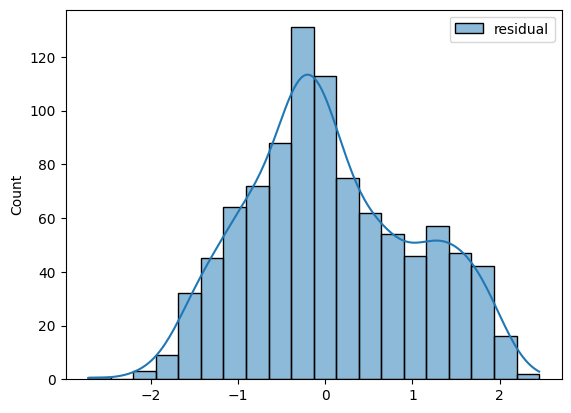

In [ ]:
# Melihat distribusi residual
residual1 = df_statsmod['actual_hour'] - df_statsmod['prediction_hour']
sns.histplot(residual1, kde=True, label="residual")
plt.legend()
plt.show()

In [ ]:
# Uji Normalitas pada Residual
stat, p = shapiro(residual1)
print('Statistics=%.3f, p=%.3f' % (stat, p))
# Pengujian Hipotesis
alpha = 0.05
if p > alpha:
  print('Gagal Tolak H0, residual berdistribusi normal')
else:
  print('Tolak H0, residual tidak berdistribusi normal')

Statistics=0.981, p=0.000
Tolak H0, residual tidak berdistribusi normal


Dari gambar diatas, plot residual yang dihasilkan membentuk lonceng, tetapi pada pengujian normalitas dengan uji Shapiro-Wilk menunjukkan bahwa residual tidak berdistribusi normal. Sehingga dapat disimpulkan residual tidak berdistribusi normal.

In [ ]:
# Memasukkan residual kedalam dataframe
df_statsmod["residual"] = residual1
df_statsmod.head()

,id,year,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,actual_hour,prediction_hour,residual
0,0.001437,0.966154,-0.455072,-0.168268,0.671378,-0.677896,0.152068,0.172022,-2.206808,1.378093,1.087011,0.597945,0.489066
1,0.807745,-1.035031,0.440501,-0.168268,0.671378,0.870750,0.152068,0.172022,-0.741030,-0.220618,0.653220,0.399564,0.253657
2,-1.225720,-1.035031,0.440501,-0.168268,0.671378,2.419395,0.896503,0.714624,1.405288,2.116466,0.797817,0.182524,0.615293
3,-1.203721,0.966154,-1.350644,-0.168268,0.671378,-0.677896,-0.166975,-0.099578,0.044209,2.976803,0.653220,-0.076306,0.729526
4,-1.387364,0.966154,-1.350644,-0.168268,-1.489473,2.419395,-2.081236,-2.360122,0.305955,1.624492,-1.660332,-0.096863,-1.563469


Plot data actual dan prediction <br>
Untuk membandingkan hasil data prediksi dengan data yang asli (actual), dapat dibentuk menjadi plot berikut :

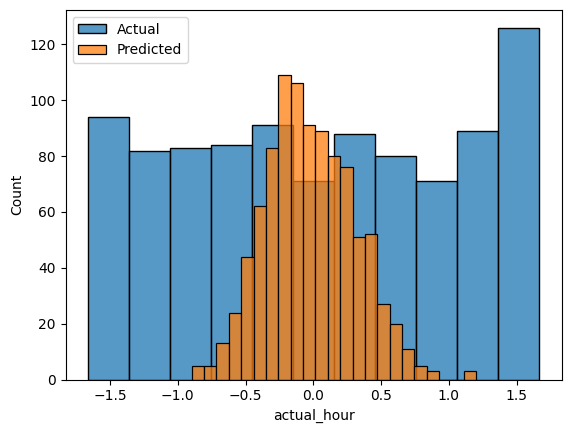

In [ ]:
# Melihat perbedaan actual dan prediksi
sns.histplot(df_statsmod['actual_hour'], label="Actual")
sns.histplot(df_statsmod['prediction_hour'], label="Predicted")
plt.legend()
plt.show()

#### Asumsi autokorelasi

Skor Durbin-Watson antara 1,5 dan 2,5 maka tidak ada autokorelasi dan asumsi puas.


In [ ]:
statsmodels.stats.stattools.durbin_watson(results.resid, axis=0)

2.0420603918618108

#### Uji Homoskedasitas

Uji Homoskedasitas untuk melihat apakah terdapat ketidaksamaan varians dari residual satu ke pengamatan ke pengamatan yang lain, dari grafik yang dihasilkan dibawah ini, terlihat data berkumpul dalam satu pusat sehingga dapat dikatakan homoskedasitas terpenuhi


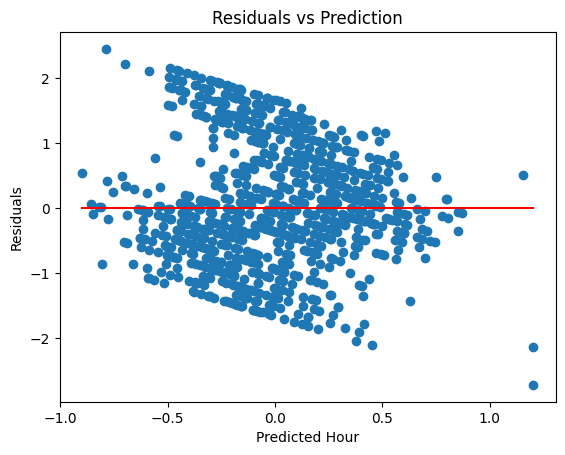

In [ ]:
asm_homosk = plt.scatter(df_statsmod['prediction_hour'], residual1)
plt.xlabel('Predicted Hour')
plt.ylabel('Residuals')
sns.lineplot(x=[df_statsmod['prediction_hour'].min(), df_statsmod['prediction_hour'].max()], y=[0, 0], color='red')
plt.title('Residuals vs Prediction')
plt.show()

## Evaluation Model

In [ ]:
# R-square
print('R-square :', metrics.r2_score(df_statsmod['actual_hour'], df_statsmod['prediction_hour']))

R-square : 0.05816676487723871


In [ ]:
# MSE
print('MSE :', metrics.mean_squared_error(df_statsmod['actual_hour'], df_statsmod['prediction_hour']))

MSE : 0.9141340347776841


##Uji Partial Analisis Regresi
**Uji Parameter T-test** memiliki tujuan, apakah variabel independent(X) memberikan pengaruh secara partial terhadap variabel dependent (Y)

In [ ]:
print("T-test scores:", results.tvalues)

T-test scores: [ -0.99426001  -0.11721934  -1.75845814   1.71576569  -1.62708939
   0.12298571   6.25954943   0.54814805   0.81652845 -12.40733697
   2.22393355]


In [ ]:
t_test_const = results.tvalues[0]
t_test_temp = results.tvalues[1]
t_test_humidity = results.tvalues[2]
t_test_windspeed = results.tvalues[3]

print("T-test score const:", t_test_const)
print("T-test score temp:", t_test_temp)
print("T-test score humidity:", t_test_humidity)
print("T-test score windspeed:", t_test_windspeed)

T-test score const: -0.9942600130515171
T-test score temp: -0.11721933512071436
T-test score humidity: -1.7584581365509793
T-test score windspeed: 1.71576568694888


In [ ]:
p_value_const = results.pvalues[0]
p_value_temp = results.pvalues[1]
p_value_humidity = results.pvalues[2]
p_value_windspeed = results.pvalues[3]

print("P-value const:", p_value_const)
print("P-value temp:", p_value_temp)
print("P-value humidity:", p_value_humidity)
print("P-value windspeed:", p_value_windspeed)

P-value const: 0.32020436195406476
P-value temp: 0.9066968201431018
P-value humidity: 0.07880698980538041
P-value windspeed: 0.08634408582639616


**Uji kelayakan model F-test** memilki tujuan, apakah model yang dibentuk layak digunakan atau tidak

In [ ]:
f_value = results.fvalue
print("f-test score : ", f_value)

p_value = results.f_pvalue
print("P-value : ", p_value)

if p_value < 0.05:
  print("Tolak H0")
else:
  print("Terima H0")

f-test score :  27.989589306132512
P-value :  5.806934197037411e-51
Tolak H0


Hasil output diatas menunjukan nilai F-test sebesar 27.99, yang merupakan ukuran dari seberapa baik model regresi yang digunakan menjelaskan variasi dalam variabel dependen dibandingkan dengan model tanpa variabel independen. Nilai p yang dihasilkan dari F-test adalah 5.81e-51, yang jelas jauh lebih kecil dari 0.05.

Dengan demikian, bisa diketahui bahwa ada cukup bukti untuk menolak hipotesis nol (H0). Ini berarti bahwa setidaknya satu dari variabel independen dalam model memiliki pengaruh signifikan terhadap variabel dependen.